In [1]:
#Import libraries 
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,110,110,120,170,174,237,273,281,299,349
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,186,197,212,223,243,259,277,304,333,361
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,409,454,511,584,716,847,986,1171,1251,1320
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,267,308,334,370,376,390,428,439,466,501
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,7,7,7,8,8,8,10,14


In [3]:
# Transform the data
df_melt = pd.melt(df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='numcases')

df_melt.tail(20)

,Province/State,Country/Region,Lat,Long,date,numcases
19630,NaN,Guinea-Bissau,11.803700,-15.180400,4/5/20,18
19631,NaN,Mali,17.570692,-3.996166,4/5/20,45
19632,NaN,Saint Kitts and Nevis,17.357822,-62.782998,4/5/20,10
19633,Northwest Territories,Canada,64.825500,-124.845700,4/5/20,4
19634,Yukon,Canada,64.282300,-135.000000,4/5/20,6
19635,NaN,Kosovo,42.602636,20.902977,4/5/20,145
19636,NaN,Burma,21.916200,95.956000,4/5/20,21
19637,Anguilla,United Kingdom,18.220600,-63.068600,4/5/20,3
19638,British Virgin Islands,United Kingdom,18.420700,-64.640000,4/5/20,3
19639,Turks and Caicos Islands,United Kingdom,21.694000,-71.797900,4/5/20,5


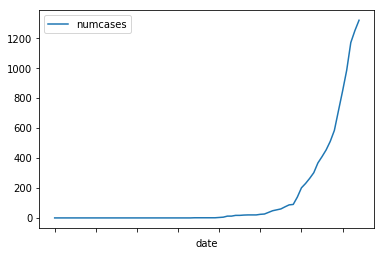

In [12]:
df_melt[df_melt['Country/Region']=="Algeria"].plot(x='date', y='numcases');

In [14]:
# Export transformed data as CSV
df_melt.to_csv("transformed-global-confirmed-cases.csv", index=False)

c:\program files\python37\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


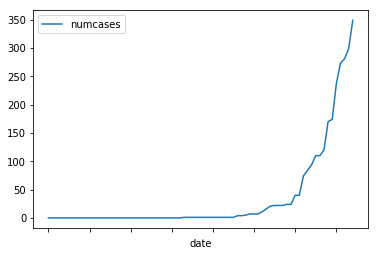

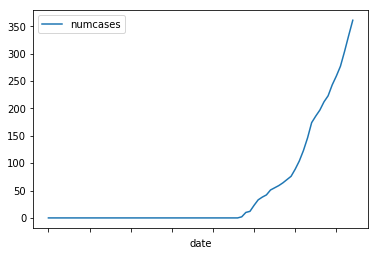

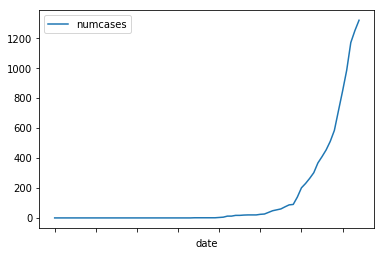

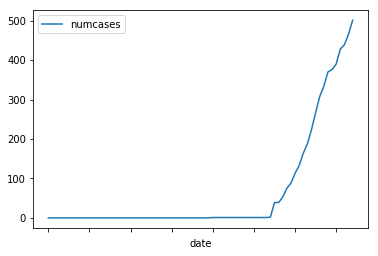

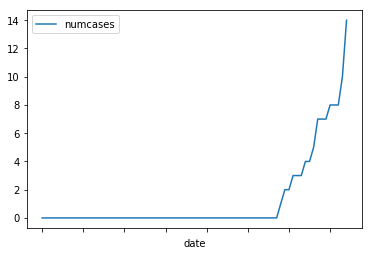

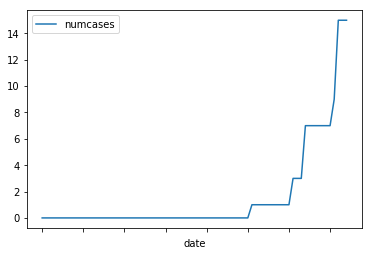

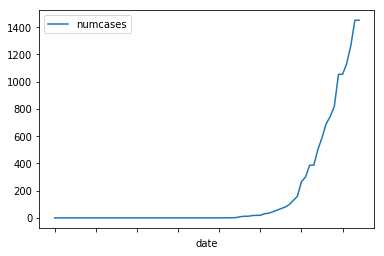

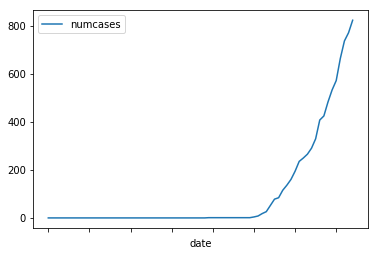

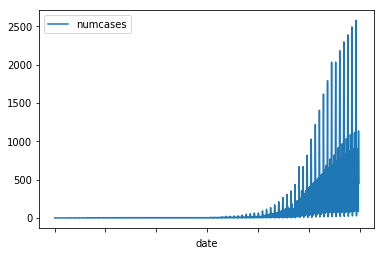

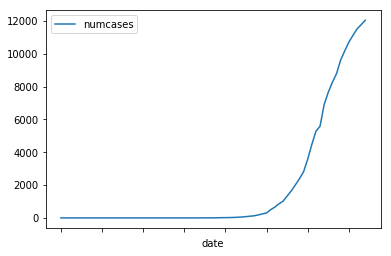

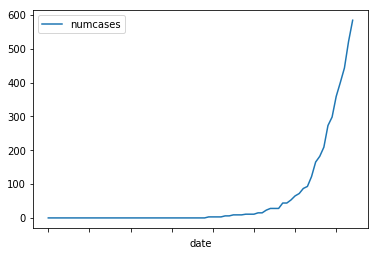

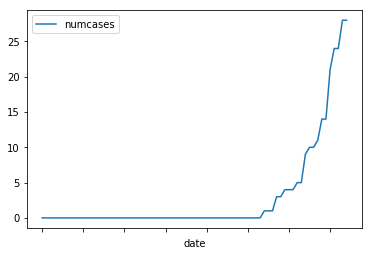

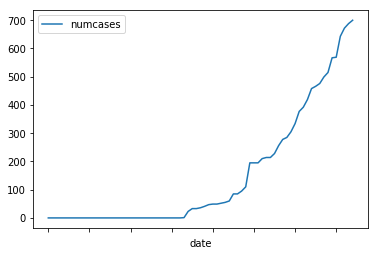

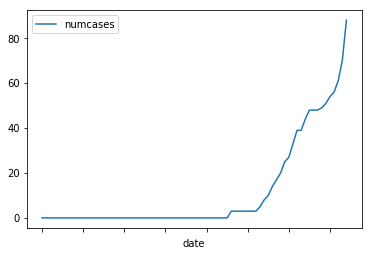

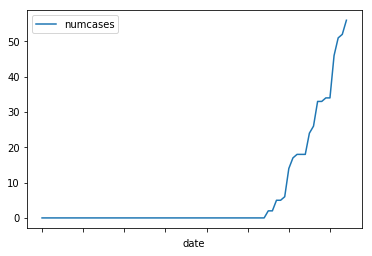

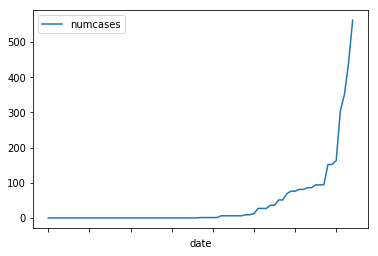

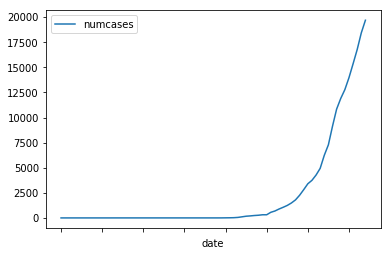

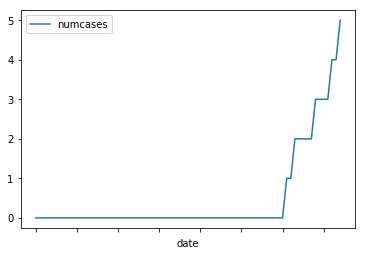

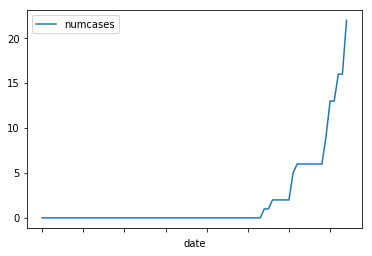

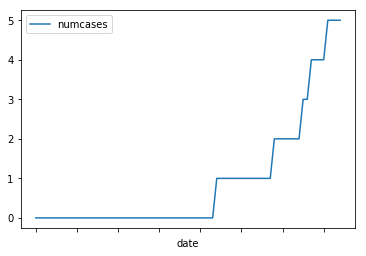

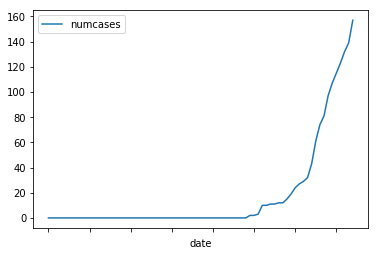

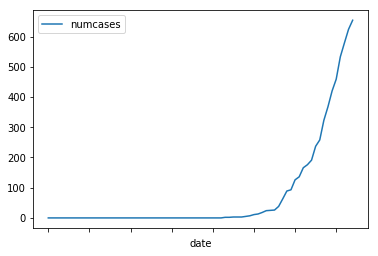

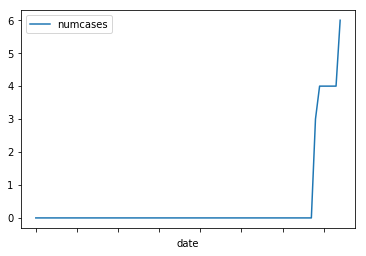

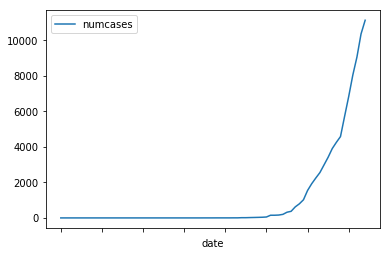

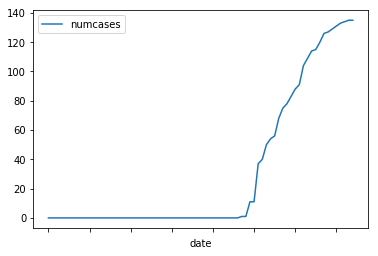

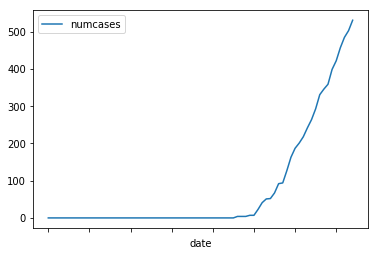

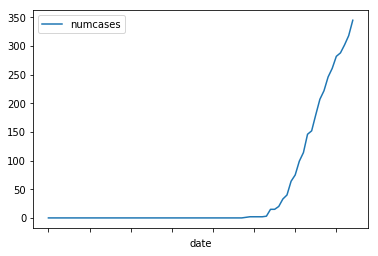

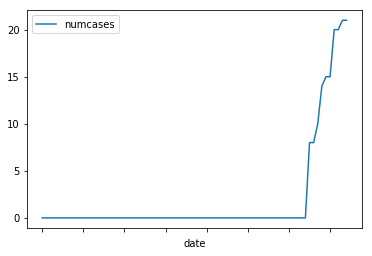

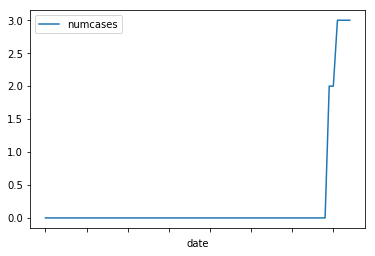

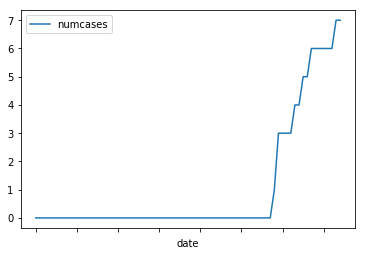

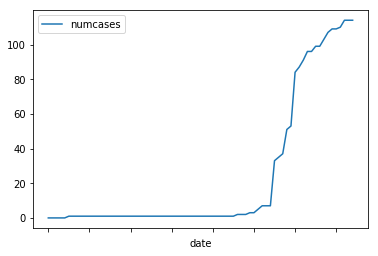

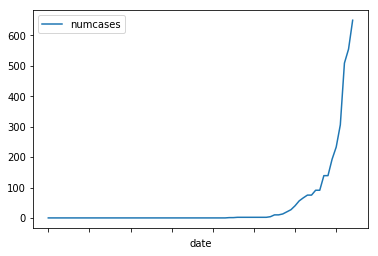

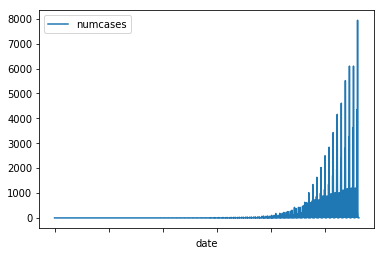

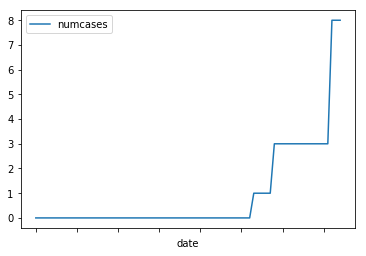

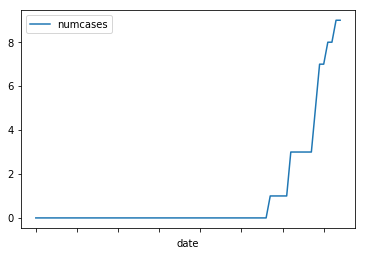

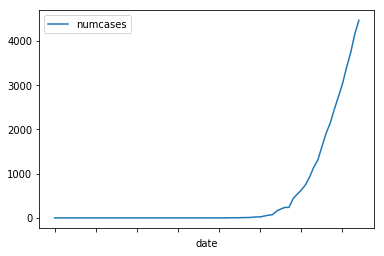

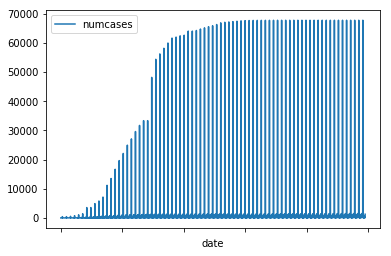

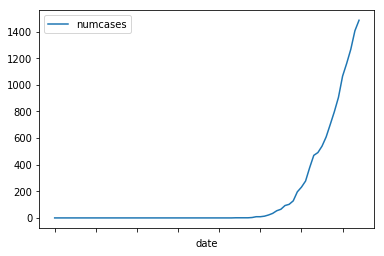

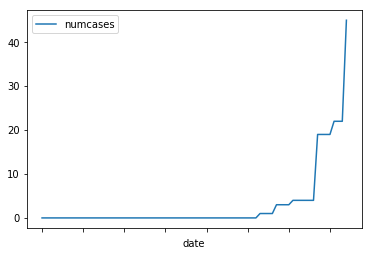

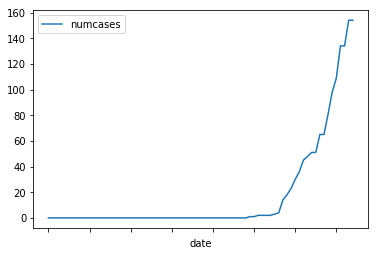

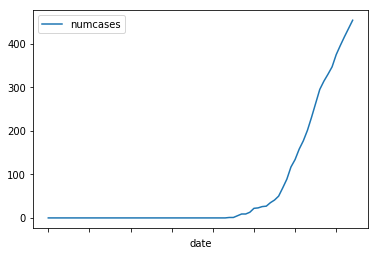

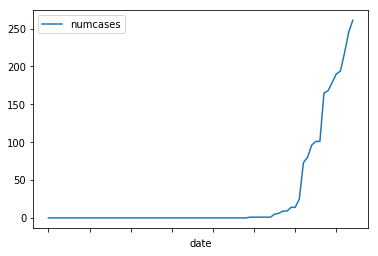

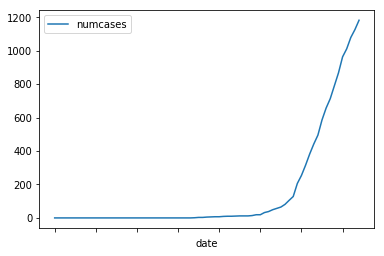

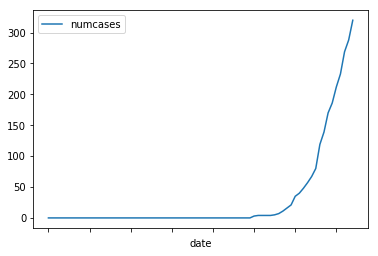

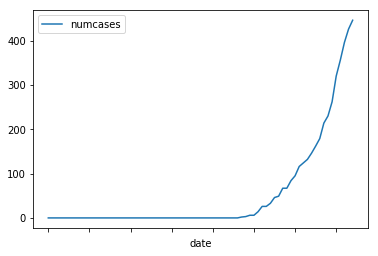

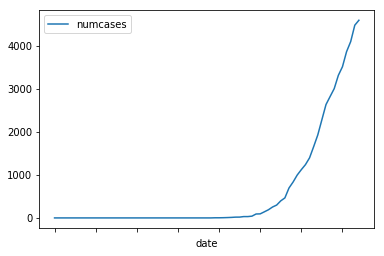

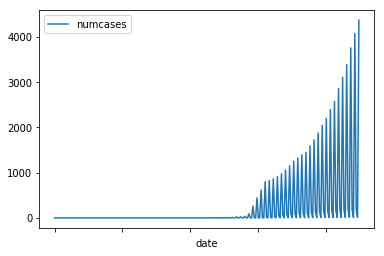

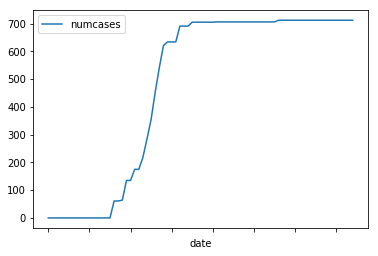

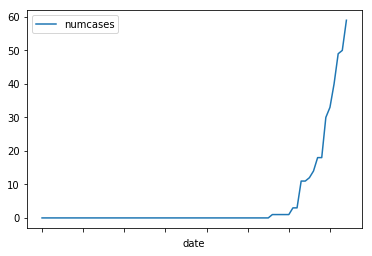

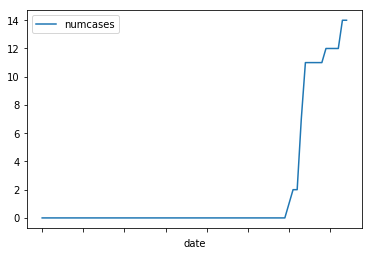

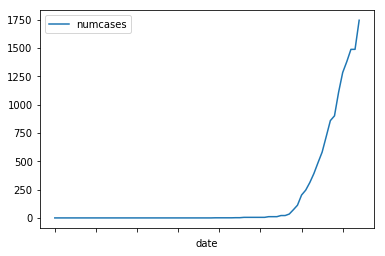

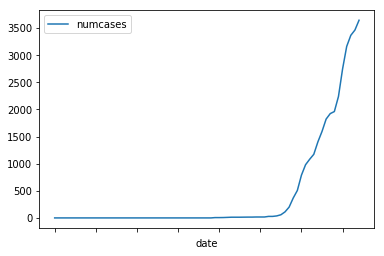

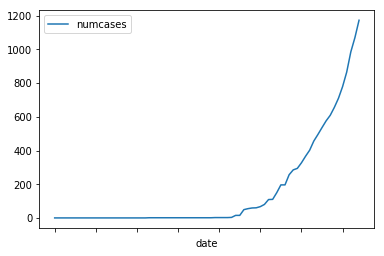

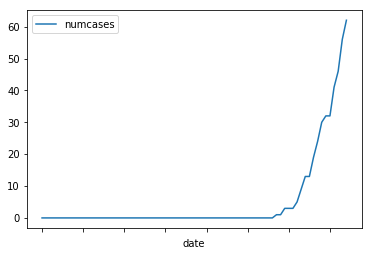

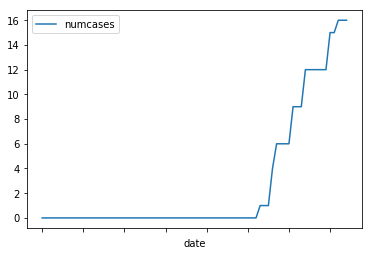

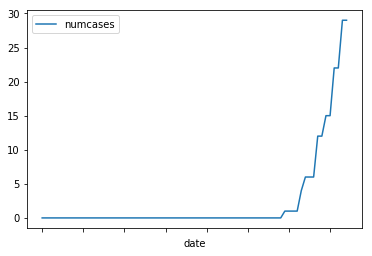

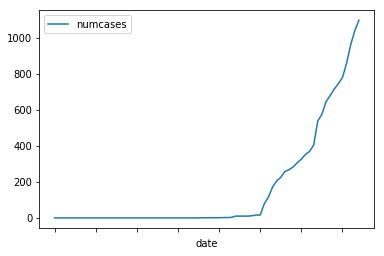

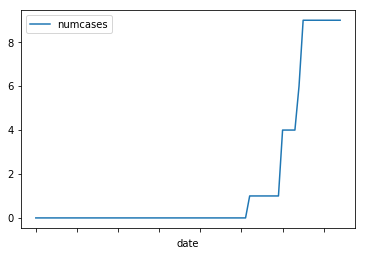

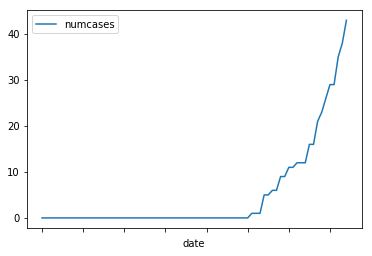

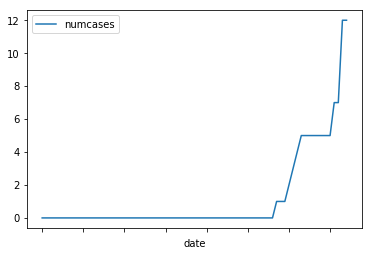

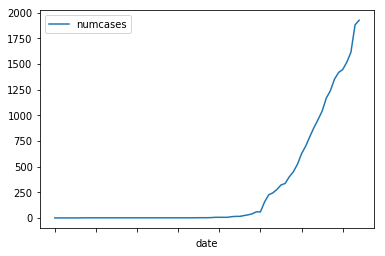

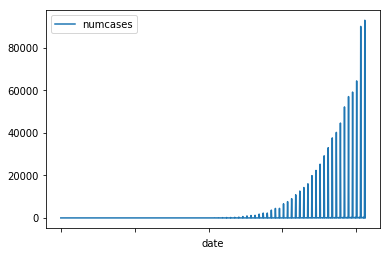

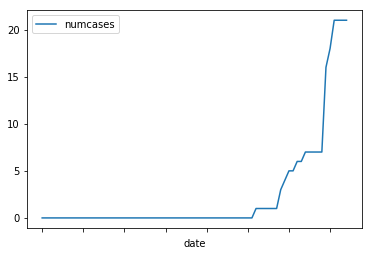

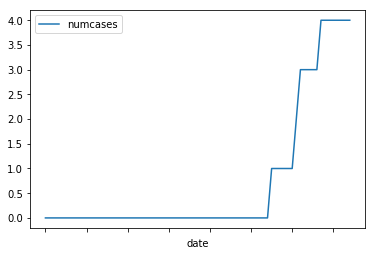

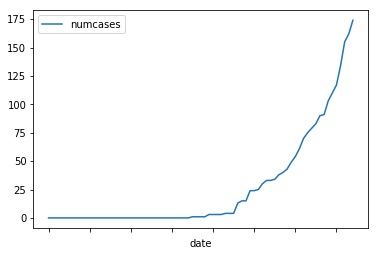

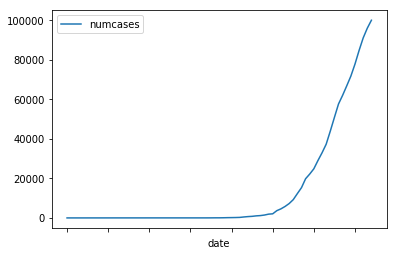

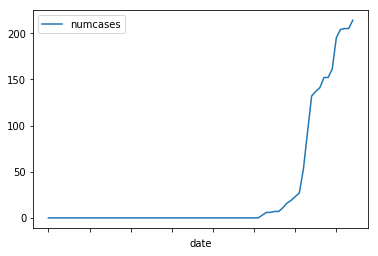

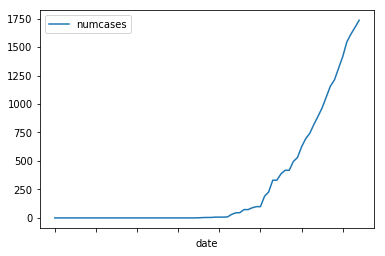

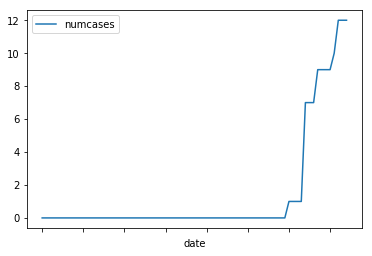

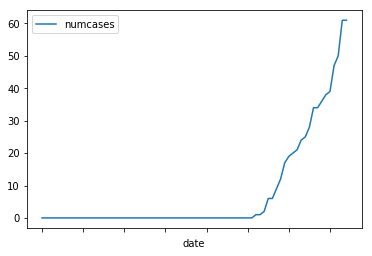

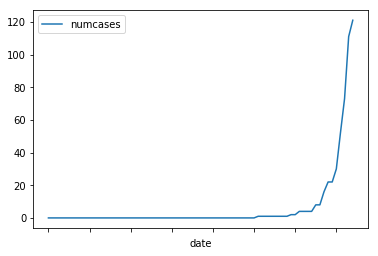

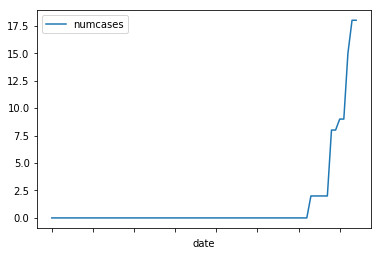

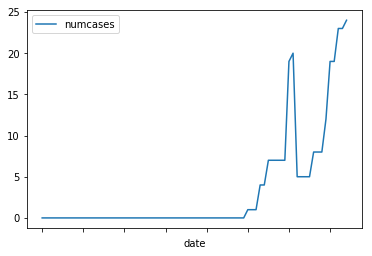

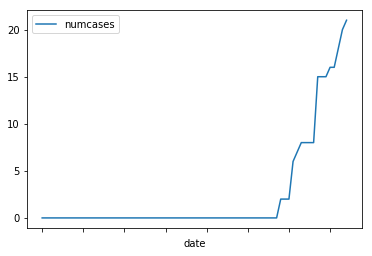

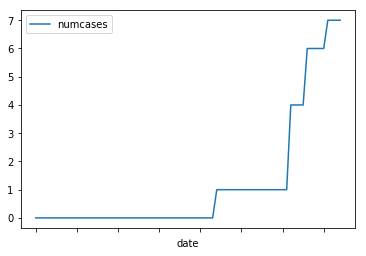

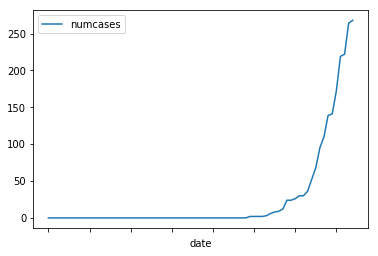

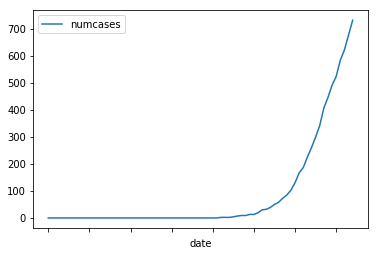

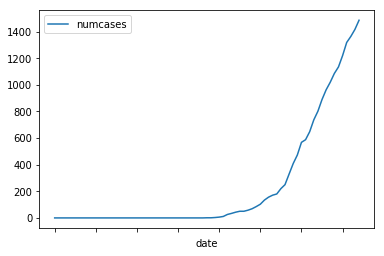

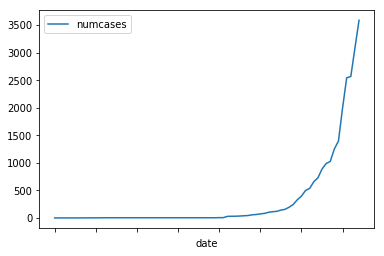

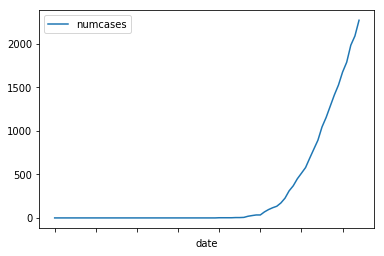

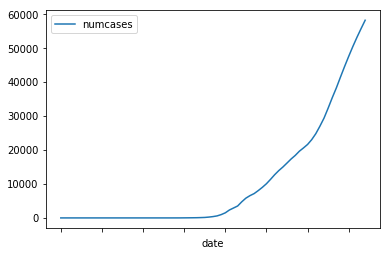

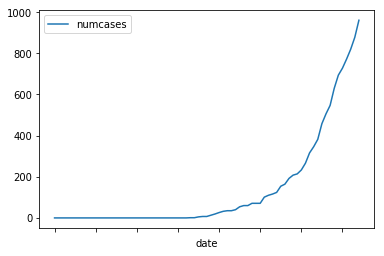

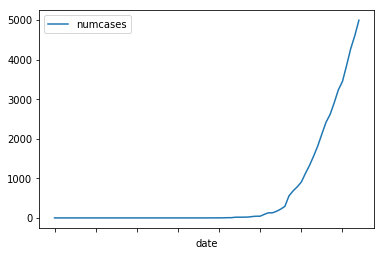

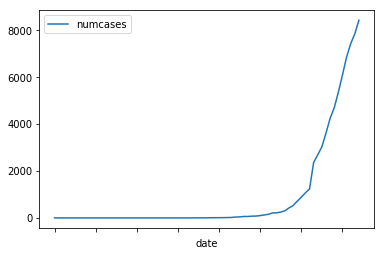

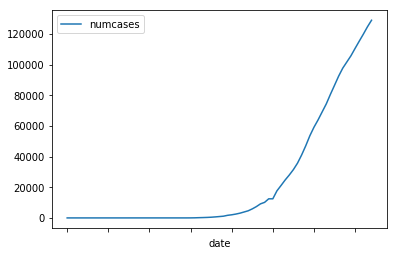

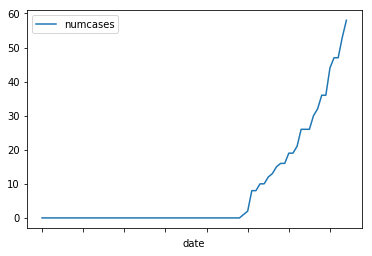

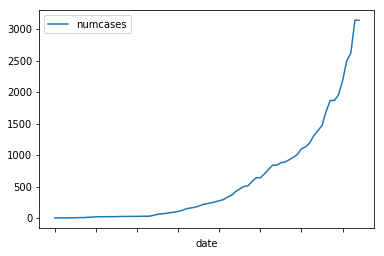

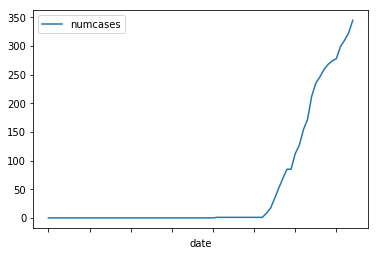

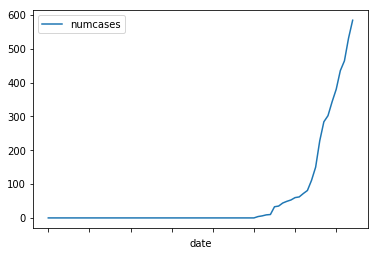

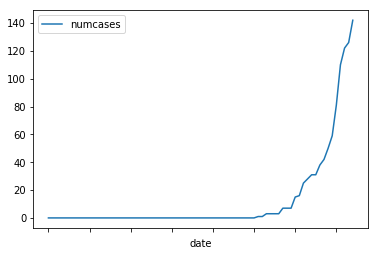

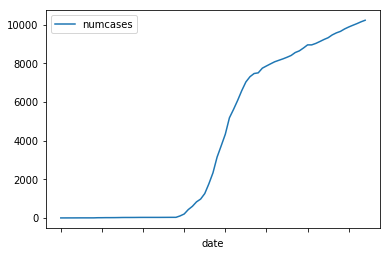

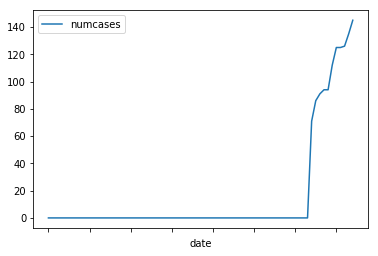

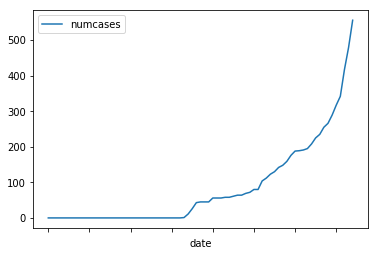

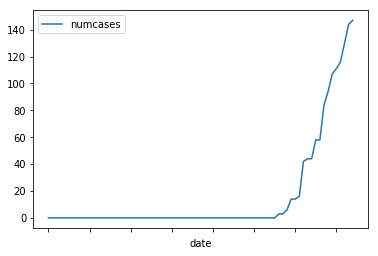

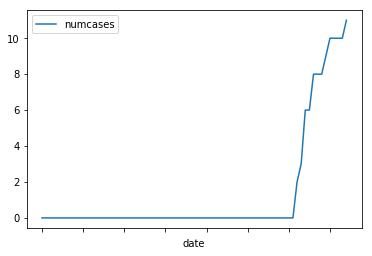

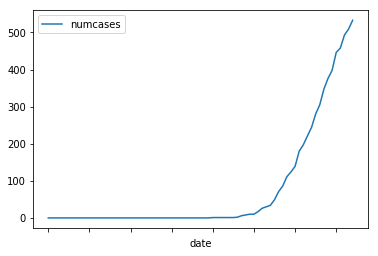

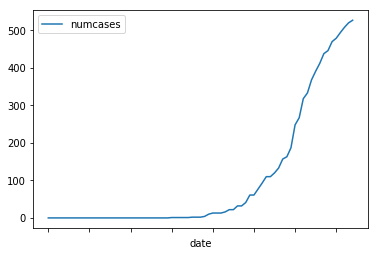

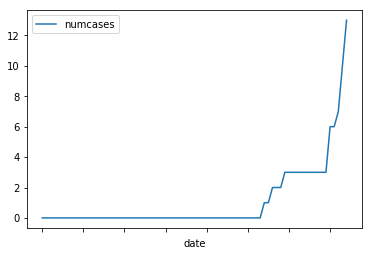

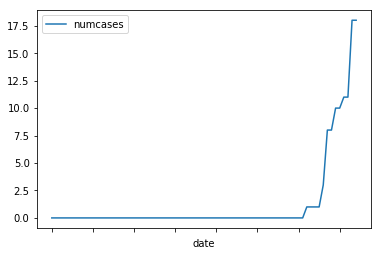

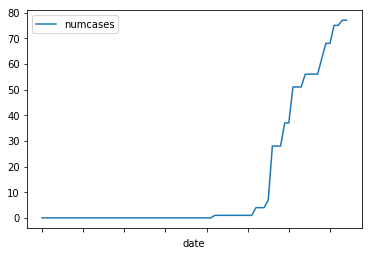

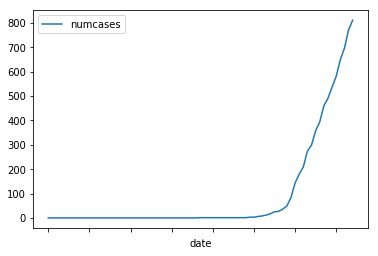

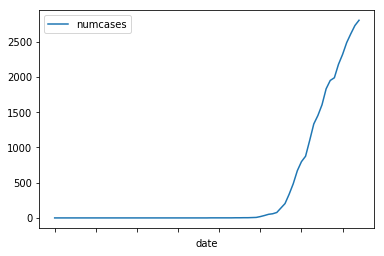

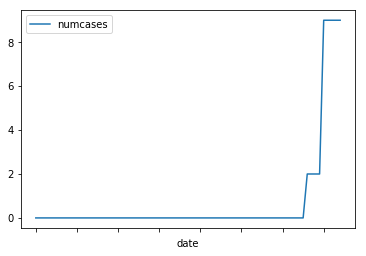

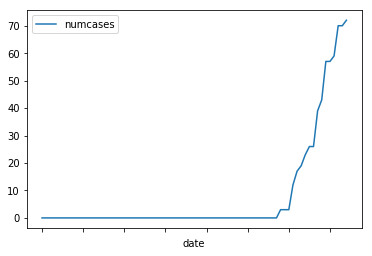

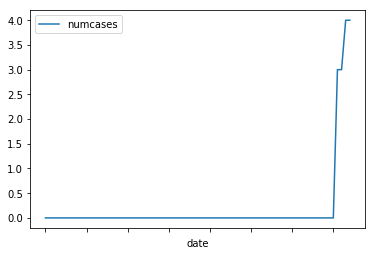

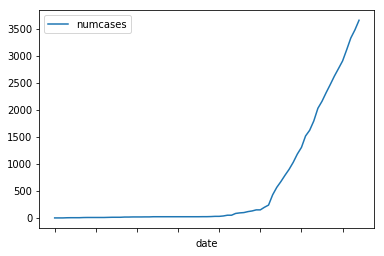

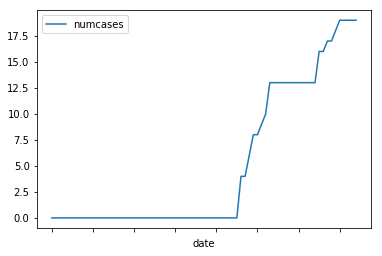

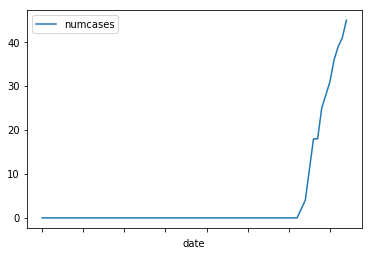

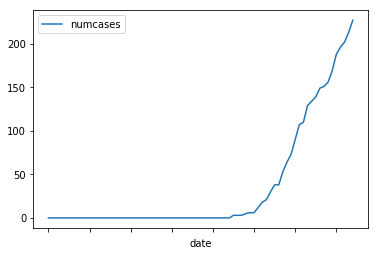

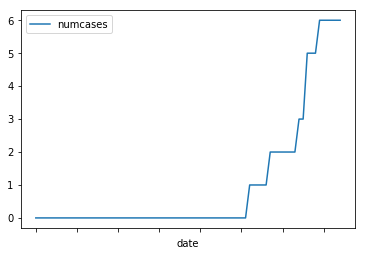

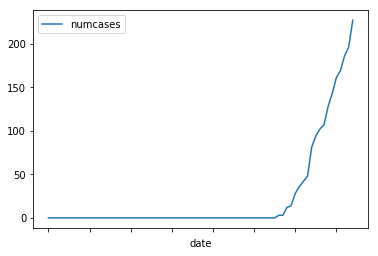

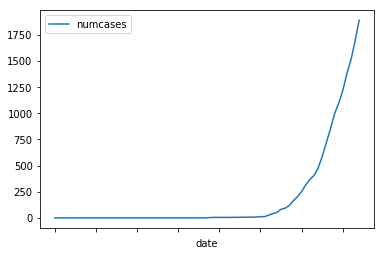

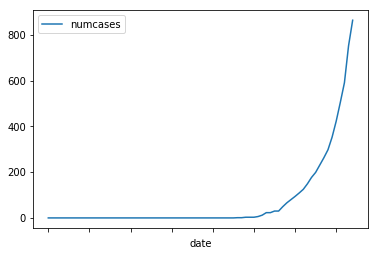

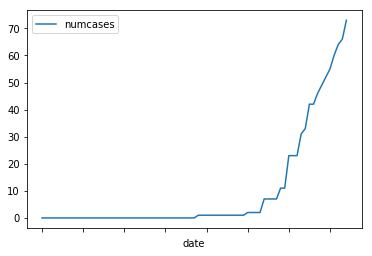

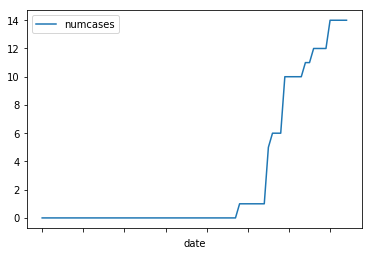

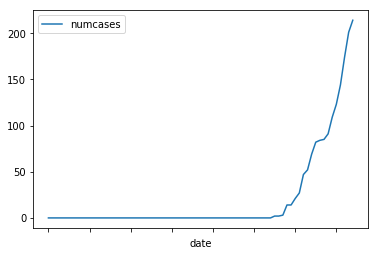

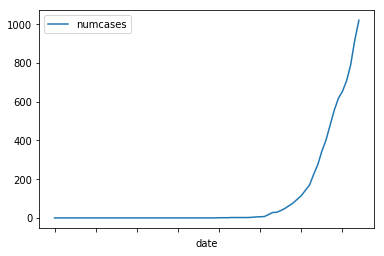

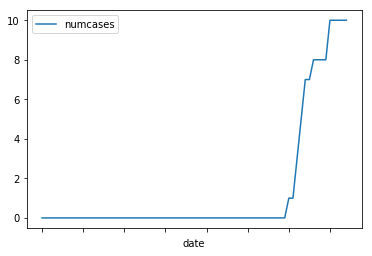

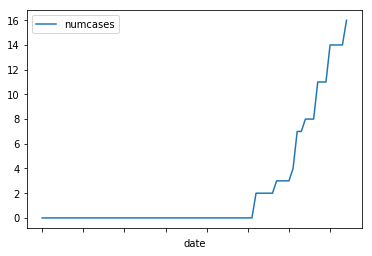

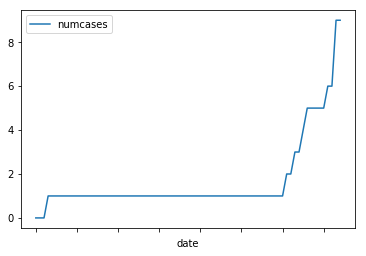

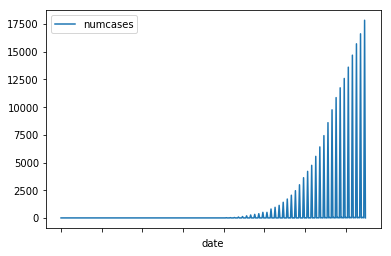

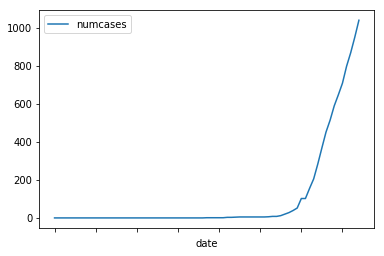

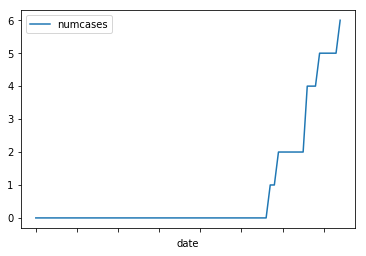

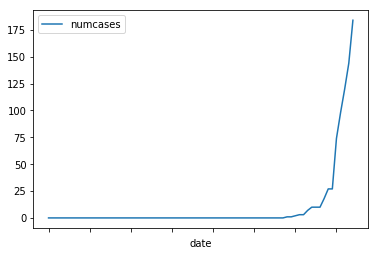

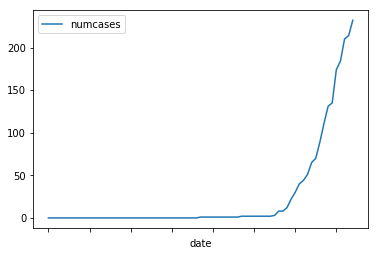

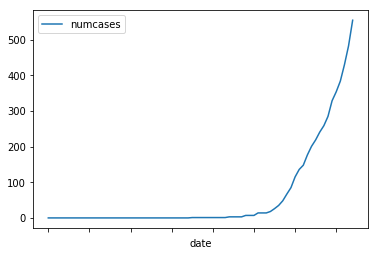

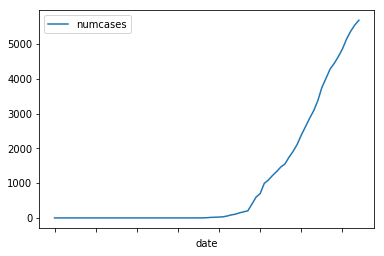

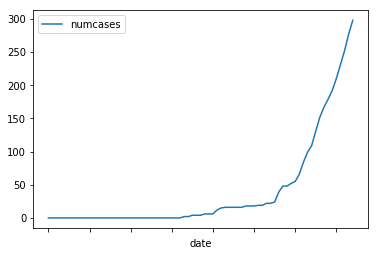

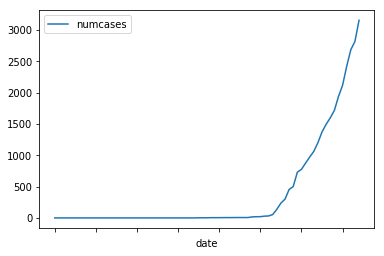

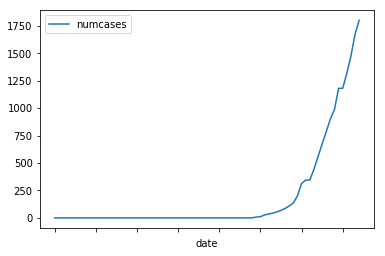

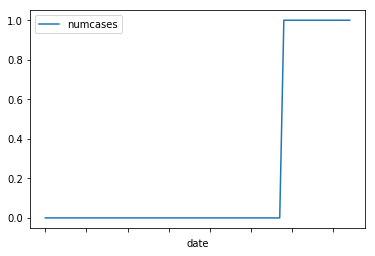

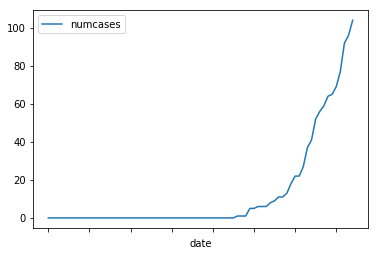

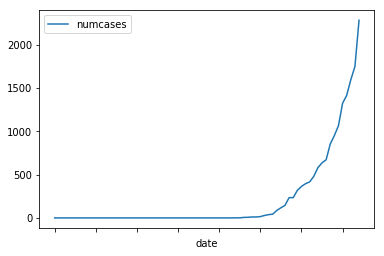

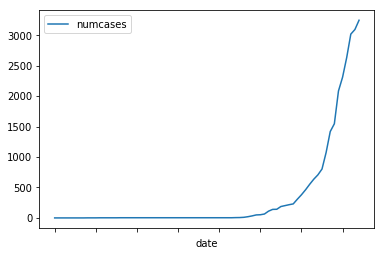

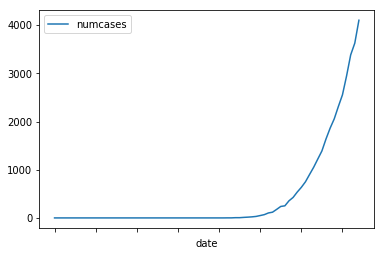

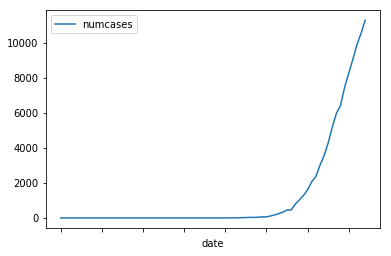

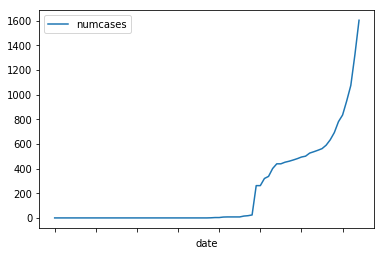

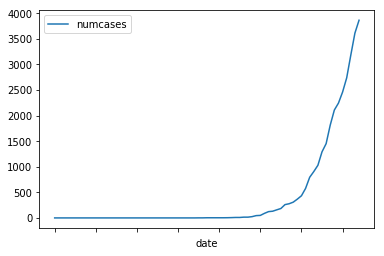

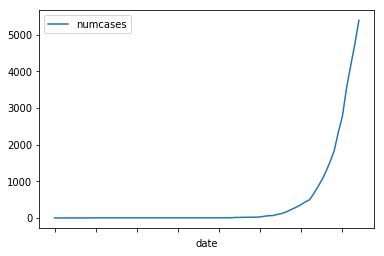

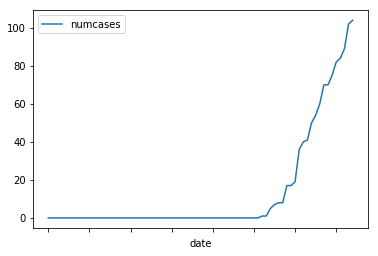

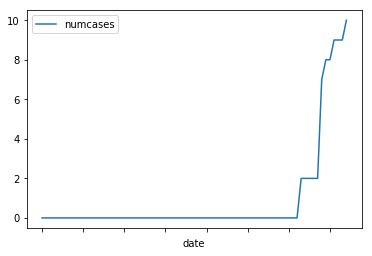

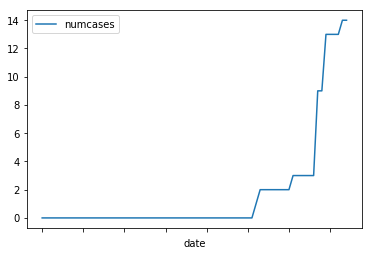

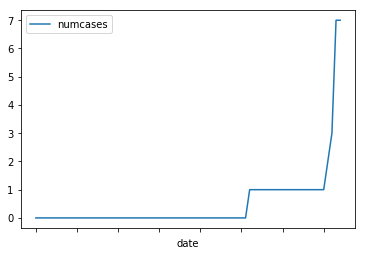

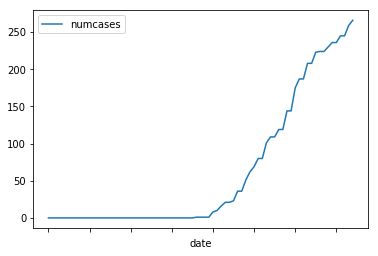

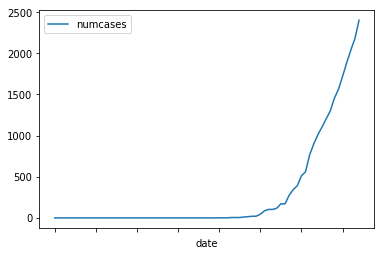

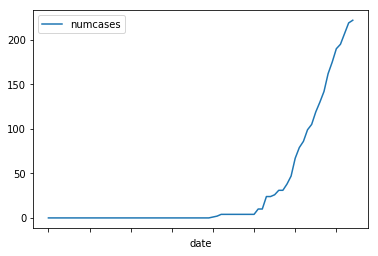

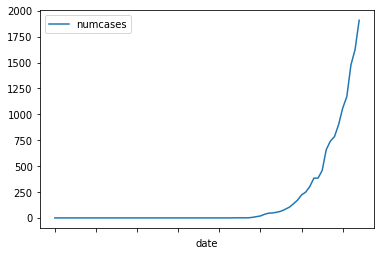

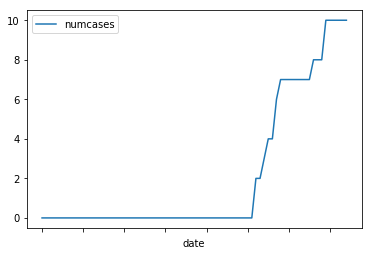

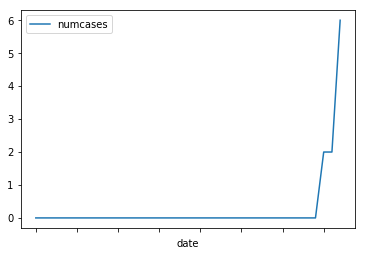

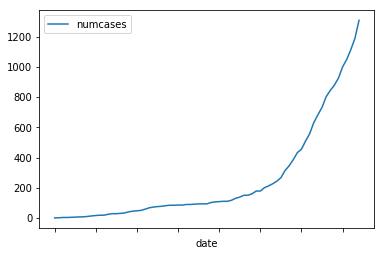

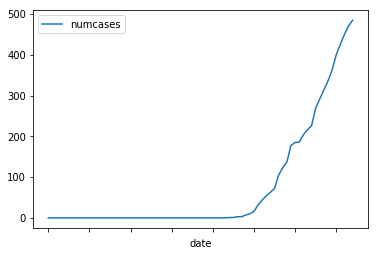

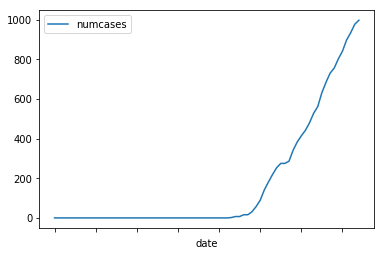

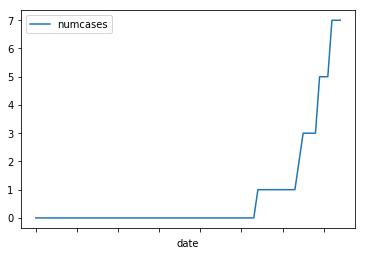

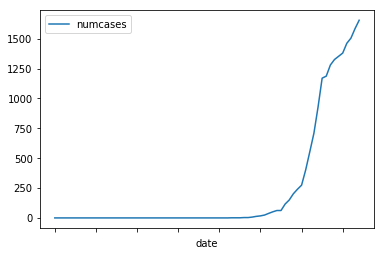

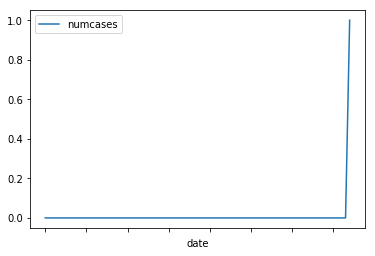

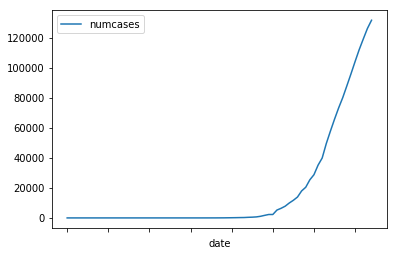

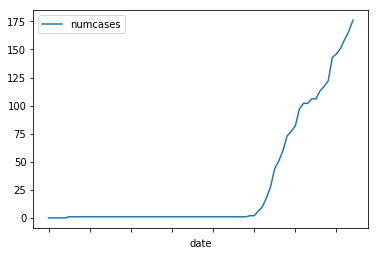

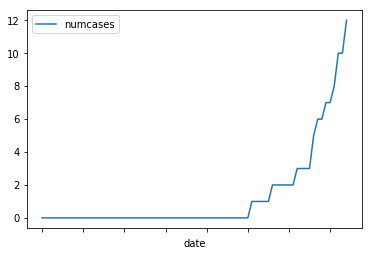

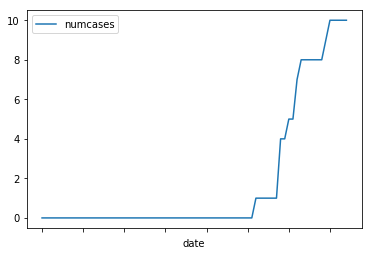

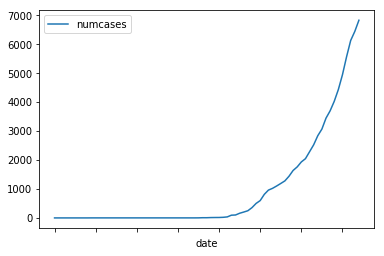

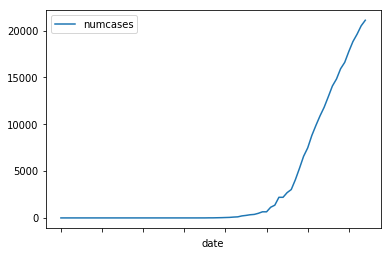

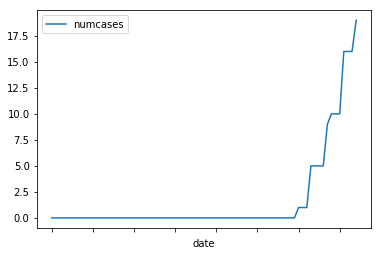

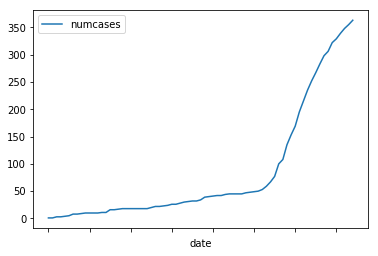

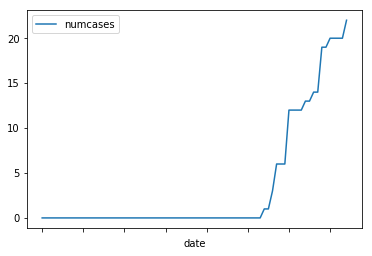

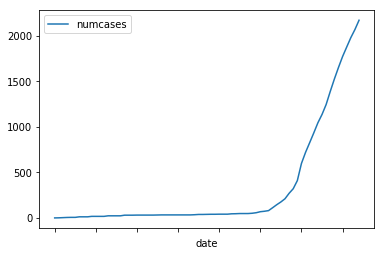

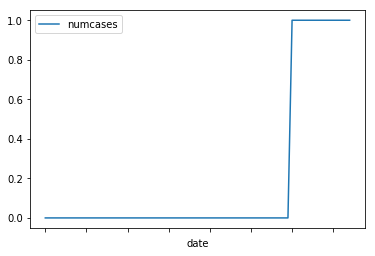

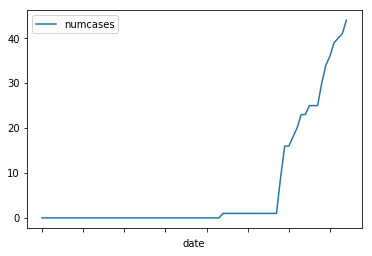

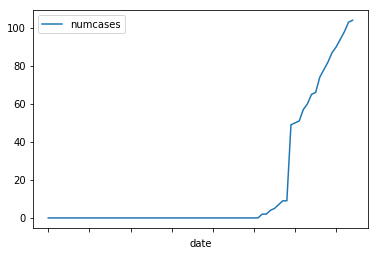

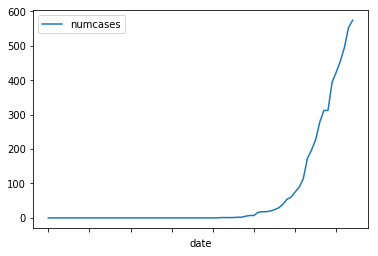

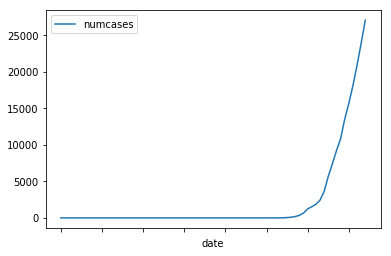

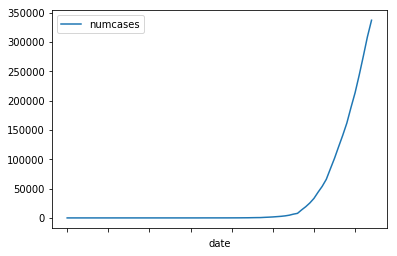

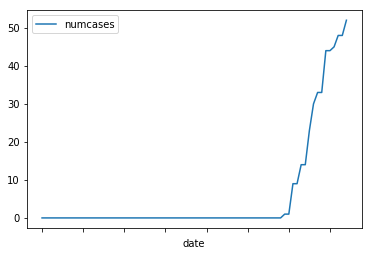

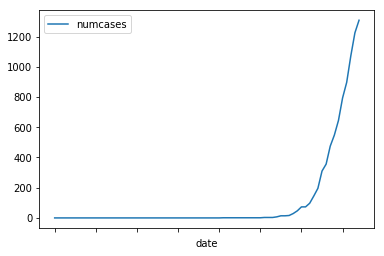

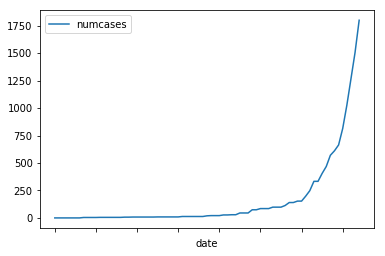

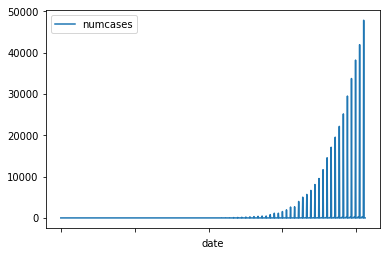

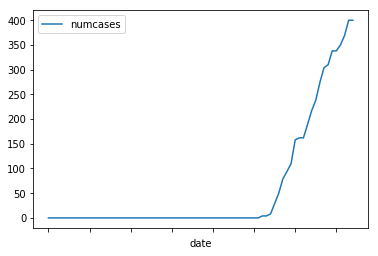

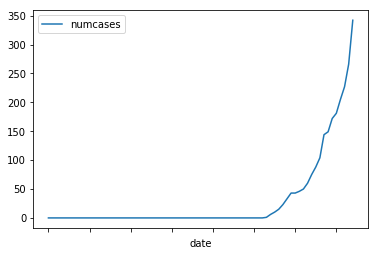

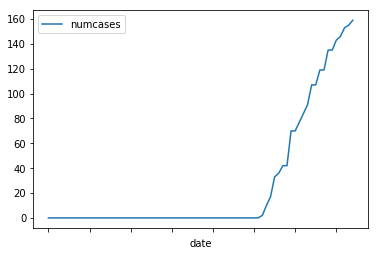

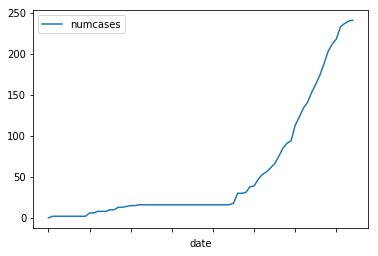

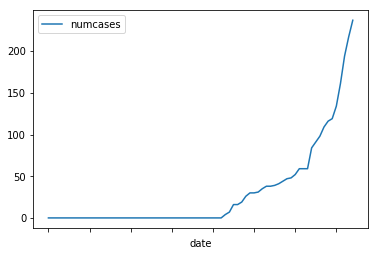

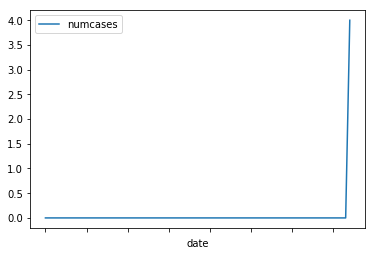

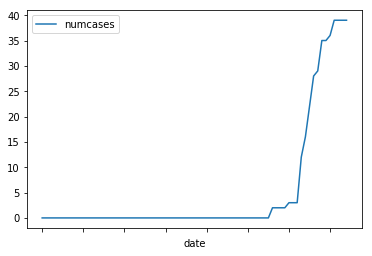

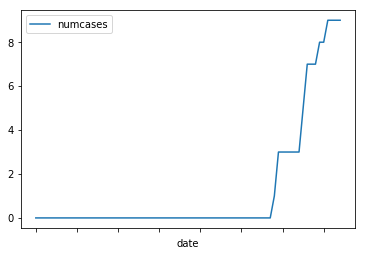

In [15]:
df_melt.groupby('Country/Region').plot(x='date', y='numcases', label='Country/Region');

In [ ]:
df_melt.tail(20)

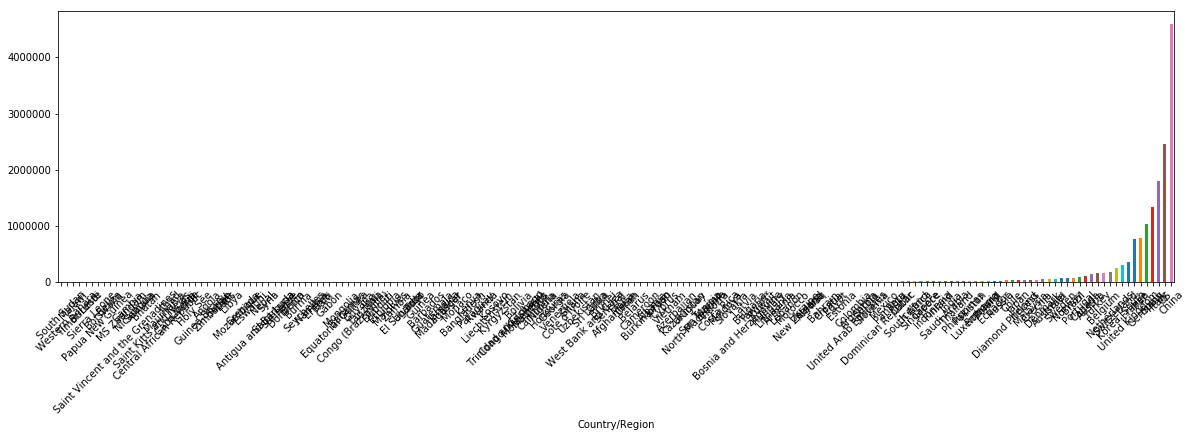

In [8]:
df_melt.groupby('Country/Region').sum()['numcases'].sort_values().plot(kind='bar', figsize=(20,5), rot=45);

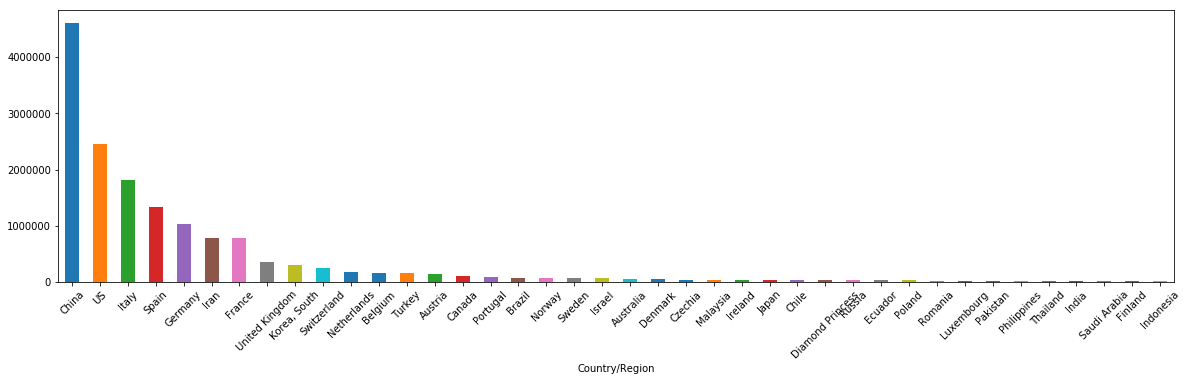

In [9]:
df_melt.groupby('Country/Region').sum()['numcases'].sort_values().nlargest(40).plot(kind='bar', figsize=(20,5), rot=45);